#  [Local Binary Convolutional Neural Networks](https://openaccess.thecvf.com/content_cvpr_2017/papers/Juefei-Xu_Local_Binary_Convolutional_CVPR_2017_paper.pdf)

  
![Convolution Diagram](../../assets/lbp_thresholding.jpg)
![Convolution Diagram](../../assets/lbp_calculation-1024x299.jpg)
![Convolution Diagram](../../assets/lbp_calculation-1024x299.jpg)


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
from tensorflow.keras import backend as K
from matplotlib import pyplot
from PIL import Image

In [2]:

class LBPLayer(layers.Layer):
    def __init__(self):
        super(LBPLayer, self).__init__()

    def build(self, input_shape):
        self.lbp_kernel = [1 << 0, 1 << 1, 1 << 2,1 << 3, 1 << 4, 1 << 5,1 << 6, 1 << 7]  
        self.H = [[ 
          [[ 0, 0, 0, 0, 0, 0, 0, 1]],
          [[ 1, 0, 0, 0, 0, 0, 0, 0]],
          [[ 0, 1, 0, 0, 0, 0, 0, 0]]
          ],
          [ 
          [[ 0, 0, 0, 0, 0, 0, 1, 0]],
          [[-1,-1,-1,-1,-1,-1,-1,-1]],
          [[ 0, 0, 1, 0, 0, 0, 0, 0]]
          ],
          [ 
          [[ 0, 0, 0, 0, 0, 1, 0, 0]],
          [[ 0, 0, 0, 0, 1, 0, 0, 0]],
          [[ 0, 0, 0, 1, 0, 0, 0, 0]]
        ]]

        self.kernel = tf.constant(self.H , dtype=tf.float32)

    def call(self, image_original):
        image = image_original #  tf.image.rgb_to_grayscale(image_original)
        conv = tf.nn.conv2d(image, self.kernel, strides=[1, 1, 1, 1], padding='SAME')
        sign = tf.math.sign(tf.nn.relu(conv))
        result = tf.reduce_sum(tf.multiply(sign,  self.lbp_kernel), 3)
        return result
        

In [3]:
height_reshaped = 64
width_reshaped = 64
inputs = keras.Input(shape=(height_reshaped, width_reshaped, 3))
gray_layer = tf.image.rgb_to_grayscale(inputs)
outputs = LBPLayer()(gray_layer)

model = keras.Model(inputs, outputs)

In [4]:
im = cv2.imread('../../assets/Lena.png')
im = cv2.resize(im,(int(width_reshaped),int(height_reshaped)))
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
print(gray)


[[161 159 158 ... 126 118 164]
 [157 156 156 ... 129 103  47]
 [157 157 156 ...  95  51  47]
 ...
 [ 66 102 176 ... 102  65  61]
 [ 59  72 189 ...  84  58  52]
 [ 51  56 198 ...  52  54  93]]


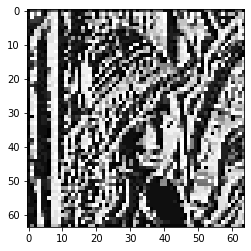

In [5]:
output = model.predict(np.array([im]))[0]
output = np.array(output)
output = output.astype(int)

pyplot.imshow(output, cmap = 'gray') 
pyplot.show()